# 01 - Tuto xarray

This notebook is set to familiarize with the `xarray` package that you will have to use in other notebooks.

## Constraints

+ 🚨 Only cells with the comment `# NOTE: Fill me!` should be filled
+ 🚨 Notebook should be saved and commited **with** outputs for the submission


+ ⚠️ The solution only requires packages listed in the `requirements/requirements.txt`

## Note

+ The `assert` statements in the notebook are here to guide the project.
However, successful `assert` statements does not guarantee that your code is correct.


In [ ]:
!pip install -r requirements/requirements.txt

In [2]:
import xarray as xr
import pandas as pd
from pathlib import Path
from datetime import datetime

%reload_ext autoreload
%autoreload 2

# 1. Parameters

In [3]:
DATA_PATH = Path("data")
RASTER_PATH = DATA_PATH / "rasters"
CSV_PATH = DATA_PATH / "csv"

# 2. Data

## 2.1 Download data

In [4]:
raster_path = RASTER_PATH / "raster_test.nc"

## 2.2 Load data

`xarray` doc: https://tutorial.xarray.dev/intro.html

`xarray.DataArray` is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:

- values: a numpy.ndarray holding the array’s values

- dims: dimension names for each axis (e.g., ('x', 'y', 'z'))

- coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)

- attrs: dict to hold arbitrary metadata (attributes)

`xarray.Dataset`

A dict-like collection of `DataArray` objects with aligned dimensions. Thus, most operations that can be performed on the dimensions of a single `DataArray` can be performed on a dataset. Datasets have data variables (see Variable below), dimensions, coordinates, and attributes.

⚠️ **In the following and in all notebooks, the term raster will denominate a `xarray.DataArray` or `xarray.Dataset`** ⚠️

In [5]:
raster = xr.load_dataset(raster_path).drop("spatial_ref")
raster

C:\Users\A0886290\AppData\Local\Temp\ipykernel_42864\834763326.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  raster = xr.load_dataset(raster_path).drop("spatial_ref")


<xarray.Dataset> Size: 61kB
Dimensions:    (time: 365, latitude: 4, longitude: 5)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
  * latitude   (latitude) float64 32B -42.34 -42.45 -42.55 -42.66
  * longitude  (longitude) float64 40B 147.1 147.2 147.3 147.4 147.5
Data variables:
    max_temp   (time, latitude, longitude) float32 29kB 21.72 22.02 ... 24.88
    avg_temp   (time, latitude, longitude) float32 29kB 8.754 8.896 ... 9.204

Here the raster is composed of 3 coordinates (`longitude`, `latitude` and `time`) and has 2 variables:
- `max_temp`: maximum temperature over one day
- `avg_temp`: average temperature over one day

# 3. Familiarize with xarray

You can have a look at the xarray doc for indexing and selecting: https://docs.xarray.dev/en/stable/user-guide/indexing.html

#### Let's now look at the variables: for example max_temp

It is a `xarray.DataArray`

In [6]:
raster["max_temp"]

<xarray.DataArray 'max_temp' (time: 365, latitude: 4, longitude: 5)> Size: 29kB
array([[[21.723846, 22.02069 , 22.58197 , 22.58197 , 22.947021],
        [21.446747, 21.446747, 22.02069 , 22.355469, 22.68747 ],
        [20.954376, 21.446747, 21.84906 , 22.209167, 22.551025],
        [21.044403, 21.38977 , 21.946838, 22.214111, 22.200043]],

       [[16.736298, 16.722961, 16.862915, 16.862915, 17.534637],
        [16.308655, 16.308655, 16.722961, 16.632904, 16.997955],
        [15.847961, 16.308655, 16.628693, 16.681458, 17.066895],
        [16.705353, 17.042969, 17.556427, 19.21286 , 18.664246]],

       [[16.134949, 16.129303, 16.074463, 16.074463, 16.453552],
        [15.752319, 15.752319, 16.129303, 16.064606, 16.25592 ],
        [15.357727, 15.752319, 16.068817, 16.187683, 16.459198],
        [15.793091, 16.19754 , 16.703247, 18.015717, 17.67389 ]],

       ...,

       [[17.751251, 17.942566, 18.287933, 18.287933, 18.911102],
        [17.08728 , 17.08728 , 17.942566, 18.043854, 18.418762],
        [16.37619 , 17.08728 , 17.653503, 17.946106, 18.413116],
        [16.936066, 17.548004, 18.325195, 20.108246, 19.649658]],

       [[17.33136 , 17.696411, 18.419464, 18.419464, 18.840057],
        [16.732788, 16.732788, 17.696411, 17.948914, 18.234467],
        [15.992859, 16.732788, 17.39325 , 17.650696, 18.015717],
        [16.350159, 17.020477, 17.799805, 18.875244, 18.554504]],

       [[24.206726, 24.052002, 23.352844, 23.352844, 23.694672],
        [24.564056, 24.564056, 24.052002, 23.88388 , 23.983765],
        [24.23767 , 24.564056, 24.72229 , 24.669556, 24.564056],
        [25.204803, 25.503723, 25.952484, 26.91397 , 24.878448]]],
      shape=(365, 4, 5), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
  * latitude   (latitude) float64 32B -42.34 -42.45 -42.55 -42.66
  * longitude  (longitude) float64 40B 147.1 147.2 147.3 147.4 147.5
Attributes:
    grid_mapping:  spatial_ref

Let's say we want to select the grid cell at position [0,0], then it becomes as follows:

In [7]:
raster["max_temp"][dict(longitude=0, latitude=0)]

<xarray.DataArray 'max_temp' (time: 365)> Size: 1kB
array([21.723846 , 16.736298 , 16.134949 , 21.890564 , 19.672852 ,
       15.453369 , 20.574554 , 27.85086  , 22.617828 , 25.209015 ,
       31.450684 , 28.589386 , 16.929749 , 19.31485  , 25.19638  ,
       22.463104 , 15.914093 , 13.77655  , 15.981598 , 18.697998 ,
       21.062714 , 26.291504 , 14.989868 , 22.802826 , 22.937164 ,
       19.421051 , 20.707489 , 24.69345  , 17.469208 , 24.545746 ,
       28.896759 , 18.415253 , 28.8609   , 24.730743 , 25.048645 ,
       18.58966  , 18.158508 , 21.311676 , 24.82077  , 28.04358  ,
       25.897614 , 21.831482 , 17.48117  , 14.672638 , 16.884033 ,
       21.899689 , 23.99643  , 21.082397 , 22.186676 , 24.926971 ,
       27.600464 , 21.187195 , 17.74002  , 16.775696 , 19.028564 ,
       24.478241 , 26.156464 , 15.266296 , 13.7034   , 15.799438 ,
       17.3609   , 23.94226  , 27.677826 , 24.507782 , 25.237152 ,
       25.55368  , 20.834808 , 15.811401 , 13.185028 , 17.771667 ,
       20.22287  , 20.710327 , 22.689575 , 24.725128 , 26.18811  ,
       25.453094 , 24.790527 , 19.61728  , 15.484314 , 12.399384 ,
       14.02063  , 16.367035 , 18.813354 , 24.619598 , 16.769379 ,
       13.905975 , 21.723846 , 15.513855 , 16.267883 , 17.76886  ,
       16.778503 , 11.582062 , 12.75528  , 16.626587 , 14.071259 ,
       17.332764 , 17.643646 , 16.789062 , 18.256287 , 18.70221  ,
...
        7.9892883,  6.932831 ,  9.129425 , 12.367035 , 15.335205 ,
       18.756378 , 17.64154  , 13.739288 , 17.512817 ,  9.580292 ,
       10.043823 , 11.982971 , 15.752319 , 17.321503 , 17.87857  ,
       10.657837 , 17.009216 ,  8.978912 ,  7.080536 , 10.238647 ,
        8.502045 , 12.421173 , 15.712921 , 20.261566 , 21.103485 ,
       12.312866 , 14.425049 , 16.377594 , 15.457611 , 15.86554  ,
       13.509277 , 19.051788 , 21.121094 , 17.609192 , 12.461975 ,
       13.323608 , 10.332886 , 10.318115 , 14.764069 , 16.695526 ,
       16.045624 , 16.911438 , 19.677765 , 19.016602 , 19.386597 ,
       24.626648 , 13.4895935, 11.357697 , 14.197876 , 14.591064 ,
       16.804535 , 11.487122 , 14.795746 , 16.44159  , 15.427368 ,
       23.284637 , 26.420929 , 20.284088 , 19.906372 , 18.588959 ,
       20.005554 , 13.937622 , 17.096436 , 16.454254 , 18.75003  ,
       20.041412 , 21.738617 , 21.188599 , 13.803284 , 16.319214 ,
       20.97055  , 22.339996 , 19.822662 , 12.61319  , 15.52652  ,
       13.264526 , 16.8573   , 21.749176 , 20.43039  , 16.600555 ,
       14.206329 , 14.865356 , 13.26944  , 16.206665 , 11.892242 ,
       18.240814 , 12.623047 , 21.609222 , 20.8721   , 12.198212 ,
       11.373169 , 18.456024 , 17.751251 , 17.33136  , 24.206726 ],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
    longitude  float64 8B 147.1
    latitude   float64 8B -42.34
Attributes:
    grid_mapping:  spatial_ref

And we can plot the timeseries over the year 2010:

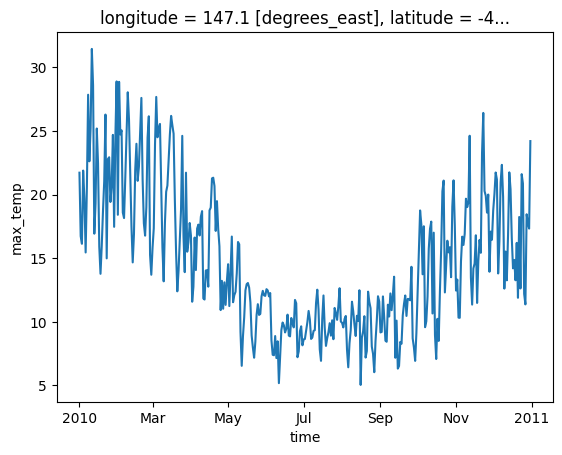

In [8]:
raster["max_temp"][dict(longitude=0, latitude=0)].plot()

If we now want to get the value for July, 1st of 2010:

In [9]:
raster["max_temp"][dict(longitude=0, latitude=0)].sel(dict(time=datetime(2010, 7, 1))).values

array(8.619507, dtype=float32)

#### Similarly, let's say, we have the coordinates (longitude and latitude) of a point and we want to know the min and mean temperature on the 5th of December 2010:

The coordinates here at in the geodesic Coordinate reference system (CRS)

For more info on CRS, please have a look at: https://docs.qgis.org/3.22/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

In [ ]:
point_latitude = -42.5776
point_longitude = 147.3224
point_date = datetime(2010, 12, 5)

2010-12-05 00:00:00


In [11]:
raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)

<xarray.Dataset> Size: 32B
Dimensions:    ()
Coordinates:
    longitude  float64 8B 147.3
    latitude   float64 8B -42.55
    time       datetime64[ns] 8B 2010-12-05
Data variables:
    max_temp   float32 4B 14.41
    avg_temp   float32 4B 4.911

And let's say, you want to access the mean temperature:

In [12]:
point_avg_temp = raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)["avg_temp"].values
point_avg_temp

array(4.9108887, dtype=float32)

# 4. Task

Your task here is to find the corresponding features associated to an ignition point. More precisely, you need to determine the elevation, population density, maximum and average temperature at the location of the ignition point and the day it occurred.

## 4.1 Load data

### 4.1.1 Rasters

In [13]:
topo_path = RASTER_PATH / "topo.nc"
weather_path = RASTER_PATH / "weather.nc"

In [97]:
topo_xr = xr.load_dataset(topo_path)
weather_xr = xr.load_dataset(weather_path)


### 4.1.2 Ignition point

In [15]:
ignition_point_path = CSV_PATH / "ignition_points.csv"

In [98]:
df_ignition = pd.read_csv(ignition_point_path, index_col=0)
df_ignition

,Date,latitude,longitude
0,2002-11-11,-42.5618,147.4595


## 4.2 Map features

🚨 You need to complement the dataframe with the raster features. 🚨

You need to use the 2 rasters and extract the information corresponding to the ignition point. You have to determine the elevation, population density, maximum and average temperature at the location of the ignition point at the time of ignition.

The expected result is shown below:

In [103]:
# NOTE: Fill me

data_weather = weather_xr.sel(time=df_ignition["Date"][0], latitude=df_ignition["latitude"][0], longitude=df_ignition["longitude"][0], method="nearest")
data_topo = topo_xr.sel(latitude=df_ignition["latitude"][0], longitude=df_ignition["longitude"][0], method="nearest")

df_ignition["elevation"], df_ignition["pop_dens"], df_ignition["max_temp"], df_ignition["avg_temp"] = int(data_topo["elevation"]), float(data_topo["pop_dens"]), round(float(data_weather["max_temp"].values),1), float(data_weather["avg_temp"].values.round(1))





In [45]:
expected_dataframe = pd.DataFrame(
    {
        "Date": {0: "2002-11-11"},
        "latitude": {0: -42.6},
        "longitude": {0: 147.5},
        "elevation": {0: 388},
        "pop_dens": {0: 2.5},
        "max_temp": {0: 19.3},
        "avg_temp": {0: 4.9},
    }
)


In [104]:
pd.testing.assert_frame_equal(df_ignition, expected_dataframe, rtol=1e-2)

---

# END OF SCRIPT